In [1]:
import os
import re
import torch.nn as nn
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cuda')

In [4]:
raw_datasets_natural_text ="raw_datasets/category_1"
output_file = "cleaned_natural_text.txt"
output_folder = "clean_datasets/category_1"

list_texts = []

for filename in os.listdir(raw_datasets_natural_text):
    if filename.endswith("txt"):
        with open(os.path.join(raw_datasets_natural_text,filename),"r",encoding = "utf-8") as file:
            print(f"Read Content from {filename}")
            text = file.read()
            text = re.sub('[^a-zA-Z0-9 \.]', '', text)
            text = text.lower().strip()
            list_texts.append(text)

all_texts = "\n\n".join(list_texts)
output_path = os.path.join(output_folder,output_file)

with open(output_path,"w",encoding = "utf-8") as file:
    file.write(all_texts)

print(f"no of sentences: {len(all_texts.split('.'))}")
print(f"no of words: {len(all_texts.split())}")
print(f"no of characters: {len(all_texts)}")
print("clean file saved/updated")



Read Content from 13sentences.txt
Read Content from 5founder.txt
Read Content from addiction.txt
Read Content from alien.txt
Read Content from ambitious.txt
Read Content from angel.txt
Read Content from aord.txt
Read Content from apple.txt
Read Content from artistship.txt
Read Content from badeconomy.txt
Read Content from before.txt
Read Content from best.txt
Read Content from bias.txt
Read Content from boss.txt
Read Content from cities.txt
Read Content from conforism.txt
Read Content from contro..txt
Read Content from convergence.txt
Read Content from convince.txt
Read Content from corpdev.txt
Read Content from cred.txt
Read Content from credentials.txt
Read Content from determination.txt
Read Content from disc.txt
Read Content from discover.txt
Read Content from distraction.txt
Read Content from divergence.txt
Read Content from dx.txt
Read Content from early.txt
Read Content from earnest.txt
Read Content from ecw.txt
Read Content from fh.txt
Read Content from foundermode.txt
Read Con

In [5]:
# with open(os.path.join(raw_datasets_natural_text,"adventures_sherlock_holmes.txt"),'r',encoding='utf-8') as file:
#     text = file.read()
#     text = re.sub('[^a-zA-Z0-9 \.]', '', text)
#     text = text.lower().strip()
# with open(os.path.join(output_folder,"trial.txt"),'w',encoding = 'utf-8') as file:
#     file.write(text)
# output_path = os.path.join(output_folder,'trial.txt')

In [6]:
with open(output_path,"r",encoding = "utf-8") as file:
    cleaned_text = file.read()

In [7]:
words = re.findall(r'\w+|\.',cleaned_text)
word_counts = Counter(words)

In [8]:
vocabulary_size = len(word_counts)
print(f"vocabulary size: {vocabulary_size} ")

vocabulary size: 12654 


In [9]:
word_counts_dict = dict(word_counts)
word_frequency = word_counts_dict.values()
word_keys = word_counts_dict.keys()


In [10]:
vocabulary_table = pd.DataFrame({"words": list(word_keys),"frequencies": list(word_frequency)})
vocabulary_table

,words,frequencies
0,one,1286
1,of,6644
2,the,11836
3,things,745
4,i,2393
...,...,...
12649,troop,1
12650,foo,1
12651,favorite,1
12652,lucked,1


In [11]:
vocabulary_table_sorted = vocabulary_table.sort_values(by="frequencies",ascending=False)
most_frequency_10 = vocabulary_table_sorted.head(10).reset_index(drop=True)
least_frequency_10 = vocabulary_table_sorted.tail(10).reset_index(drop=True)

print("most frequent")
print(most_frequency_10)
print("\n\n\n")
print("least frequent")
print(least_frequency_10)

most frequent
  words  frequencies
0     .        16123
1   the        11836
2    to         9751
3     a         6895
4    of         6644
5   you         4693
6  that         4604
7   and         4548
8    in         4058
9    it         3988




least frequent
        words  frequencies
0    shouting            1
1   semihappy            1
2    sellboth            1
3     gambles            1
4        calm            1
5  hackersbut            1
6    weirdest            1
7    cubicles            1
8  companyone            1
9      meaner            1


In [12]:
stoi = {word: i+1 for i, word in enumerate(word_keys)}
stoi["<unk>"] =0
itos = {i+1: word for i, word in enumerate(word_keys)}
itos[0] = "<unk>"

print("stoi example:", list(stoi.items())[:10])
print("itos example:", list(itos.items())[:10])

stoi example: [('one', 1), ('of', 2), ('the', 3), ('things', 4), ('i', 5), ('always', 6), ('tell', 7), ('startups', 8), ('is', 9), ('a', 10)]
itos example: [(1, 'one'), (2, 'of'), (3, 'the'), (4, 'things'), (5, 'i'), (6, 'always'), (7, 'tell'), (8, 'startups'), (9, 'is'), (10, 'a')]


In [13]:
paragraphs = [p.strip() for p in cleaned_text.split('\n') if p.strip() != '']
paragraphs_tokens=[]
for para in paragraphs:
    words = re.findall(r'\w+|\.', para)
    paragraphs_tokens.append(words)

In [14]:
block_size = 20

In [15]:
X,Y = [],[]
for para in paragraphs_tokens:
    context = [stoi['.']] * block_size
    for w in para:
        if w not in stoi:
            continue
        ix = stoi[w]
        X.append(context)
        Y.append(ix)
        #print(' '.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

print(f"shape of X {X.shape}")
print(f"shape of Y {Y.shape}")





shape of X torch.Size([287675, 20])
shape of Y torch.Size([287675])


In [16]:
vocabulary_size = len(stoi)

In [17]:
#torch.save({'X':X,'Y':Y,'vocab_size':vocabulary_size,'stoi':stoi,'itos':itos},'kernal.pt')

In [18]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.1,random_state=42)
train_loader = DataLoader(TensorDataset(X_train,Y_train),batch_size = 1024,shuffle= True)
val_loader = DataLoader(TensorDataset(X_val,Y_val),batch_size=1024)

In [19]:
# import pickle

# with open("stoi.pkl", "wb") as f:
#     pickle.dump(stoi, f)

# with open("itos.pkl", "wb") as f:
#     pickle.dump(itos, f)


In [20]:
class MLPTextGenerator(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, hidden_size=1024,block_size=10,dropout_value = 0.2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.fc1 = nn.Linear(embed_dim * block_size, hidden_size)
        self.act = nn.ReLU()
        self.dropout = nn.Dropout(dropout_value)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.out = nn.Linear(hidden_size, vocab_size)


    def forward(self, x):
        emb = self.dropout(self.embedding(x))                     
        emb = emb.view(emb.size(0), -1)             
        h = self.act(self.fc1(emb)) 
        h = self.dropout(h)           
        h = self.act(self.fc2(h))
        h = self.dropout(h)
        logits = self.out(h)                       
        return logits


In [21]:
model = MLPTextGenerator(vocab_size = vocabulary_size,block_size=block_size).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-2,weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()


In [22]:
def evaluate():
    model.eval()
    total_val_loss = 0
    batch_count = 0
    
    with torch.no_grad(),torch.amp.autocast('cuda'):
        for x_val_batch,y_val_batch in val_loader:
            x_val_batch = x_val_batch.to(device)
            y_val_batch = y_val_batch.to(device)
            logits = model(x_val_batch)
            val_loss = criterion(logits,y_val_batch)
            total_val_loss +=val_loss.item()
            batch_count+=1
    
    return total_val_loss/batch_count

In [178]:
epochs = 20
batch_size = 1024
scaler = torch.amp.GradScaler()
for epoch in range(epochs):
    for x_train_batch,y_train_batch in train_loader:
        x_train_batch = x_train_batch.to(device)
        y_train_batch = y_train_batch.to(device)
        optimizer.zero_grad()
        with torch.amp.autocast('cuda'):
            logits = model(x_train_batch)
            loss = criterion(logits,y_train_batch)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()



    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Training Loss = {loss.item():.4f} , Validation Loss = {evaluate():.4f}")
    torch.cuda.empty_cache()
    


Epoch 0: Training Loss = 5.8762 , Validation Loss = 6.1475
Epoch 1: Training Loss = 5.6308 , Validation Loss = 5.8290
Epoch 2: Training Loss = 5.2378 , Validation Loss = 5.7521
Epoch 3: Training Loss = 5.3136 , Validation Loss = 5.7628
Epoch 4: Training Loss = 4.9995 , Validation Loss = 5.8044
Epoch 5: Training Loss = 5.4788 , Validation Loss = 5.9104


KeyboardInterrupt: 

In [56]:
def generate_text(model, start_context, length=20, block_size=10, temperature=1.0):
    model.eval()
    generated = start_context.lower().split()

    for _ in range(length):
        context_words = generated[-block_size:]
        if len(context_words) < block_size:
            context_words = ["<unk>"] * (block_size - len(context_words)) + context_words

        input_idx = [stoi.get(w, 0) for w in context_words]
        input_tensor = torch.tensor(input_idx, dtype=torch.long).unsqueeze(0).to(device)

        with torch.no_grad():
            logits = model(input_tensor)
            logits = logits / temperature
            probs = F.softmax(logits, dim=-1)
            next_idx = torch.multinomial(probs, num_samples=1).item()

        generated.append(itos.get(next_idx, "<unk>"))

    return " ".join(generated)


In [57]:
print(generate_text(model,"how important is money",block_size=block_size))


how important is money pet 1999 boundary shocking executive texas ventures with discrimination cooperate falsifiable scanning dh5 import batteries calm problemsbut ecological expensive parser


## Visualizing Embeddings - TSNE

In [45]:
model_10 = MLPTextGenerator(embed_dim=32,vocab_size=vocabulary_size,block_size=10)
model_20 = MLPTextGenerator(embed_dim=32,vocab_size=vocabulary_size,block_size=20)

state_dict_10 = torch.load("mlp_streamlit_q1\models\category_1\model_category_1_10_32_ReLU_state.pt",map_location ='cpu')
state_dict_20 = torch.load('mlp_streamlit_q1\models\category_1\model_category_1_20_32_ReLU_state.pt',map_location='cpu')
model_10.load_state_dict(state_dict_10)
model_20.load_state_dict(state_dict_20)

<All keys matched successfully>

In [46]:
import pickle
with open("mlp_streamlit_q1/vocab/category_1/stoi.pkl", "rb") as f:
    stoi = pickle.load(f)

with open("mlp_streamlit_q1/vocab/category_1/itos.pkl", "rb") as f:
    itos = pickle.load(f)



In [47]:
top_words_10 = sorted(word_counts_dict.items(),key = lambda x:x[1],reverse=True)[:30]
top_words_10 = [w for w,_ in top_words_10]
top_indices_10 = [stoi[w] for w in top_words_10]

top_embeddings_10 = model_10.embedding.weight[top_indices_10].detach().cpu().numpy()
top_embeddings_10_2d = TSNE(n_components=2,random_state=42,perplexity=5).fit_transform(top_embeddings_10)

In [48]:
top_words_20 = sorted(word_counts_dict.items(),key = lambda x:x[1],reverse=True)[:30]
top_words_20= [w for w,_ in top_words_20]
top_indices_20 = [stoi[w] for w in top_words_20]

top_embeddings_20 = model_20.embedding.weight[top_indices_20].detach().cpu().numpy()
top_embeddings_20_2d = TSNE(n_components=2,random_state=42,perplexity=5).fit_transform(top_embeddings_20)

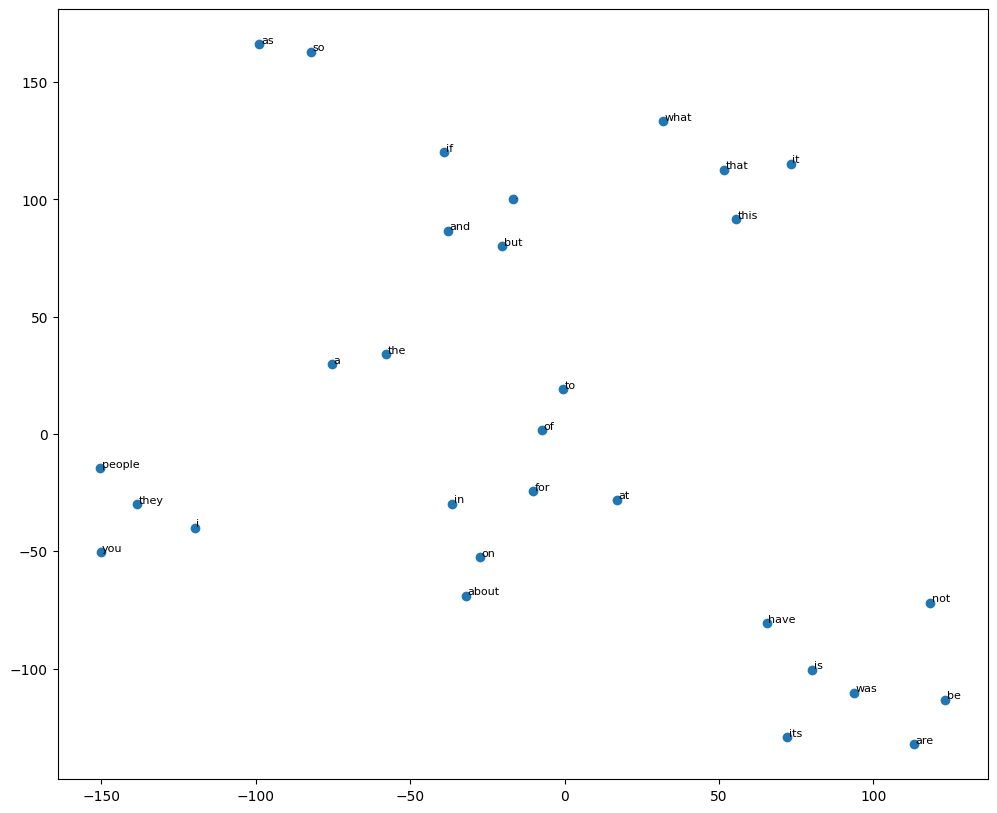

In [54]:
plt.figure(figsize=(12,10))
plt.scatter(top_embeddings_10_2d[:,0], top_embeddings_10_2d[:,1])

for i, word in enumerate(top_words_10):
    plt.text(top_embeddings_10_2d[i,0]+0.5, top_embeddings_10_2d[i,1]+0.5, word, fontsize=8)

plt.show()

Words like “the”, “a”, “of”, “to”, “in”, “for”, “on”, “at” are more spread out now.The verbs “is”, “are”, “was”, “be”, “have”, “not” form a consistent lower-right group which means that the model is still able to distinguish and cluster verbs even though less block size

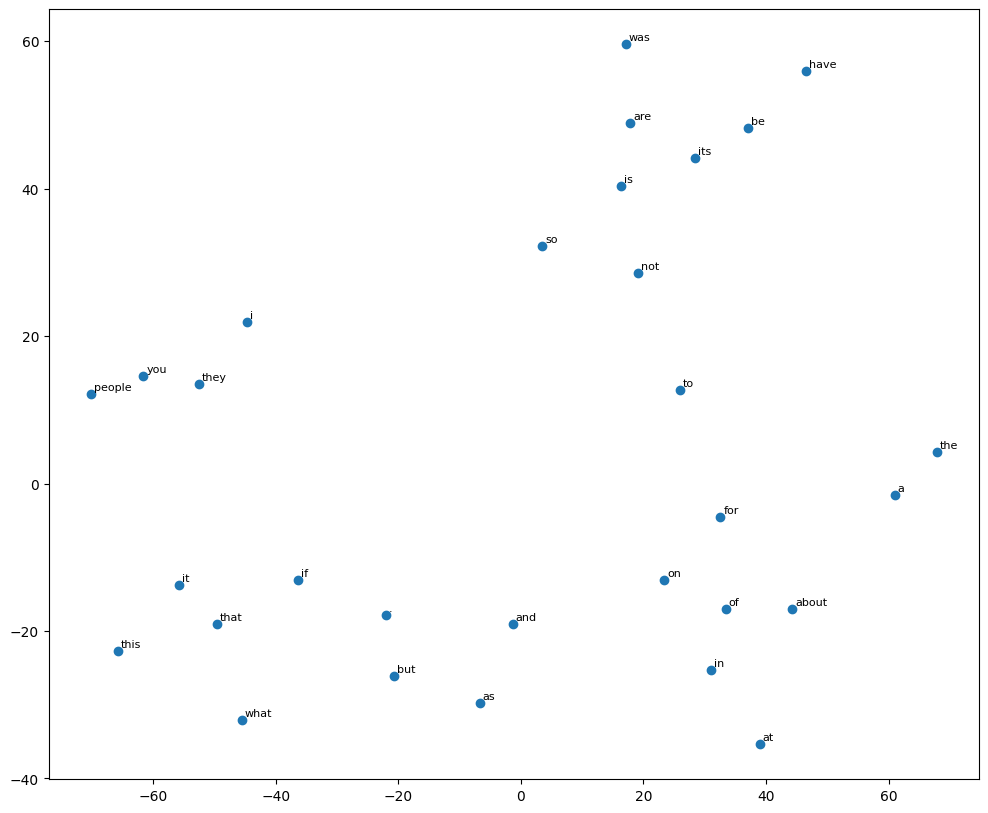

In [53]:
plt.figure(figsize=(12,10))
plt.scatter(top_embeddings_20_2d[:,0], top_embeddings_20_2d[:,1])

for i, word in enumerate(top_words_20):
    plt.text(top_embeddings_20_2d[i,0]+0.5, top_embeddings_20_2d[i,1]+0.5, word, fontsize=8)

plt.show()

The model here with context size 20 is able to group helping words like “is”, “are”, “was”, “be”, “its” and was and prepositions like “the”, “a”, “of”, “in”, “for”, “on”, “at”, “about” are closer. Nouns and Pronouns are also closer like "you", "they", "people". Thus we can see some semantic clustering. We can observe that larger block size helps in better clustering

## Comparative Analysis

### Dataset size, vocabulary, context predictability

The natural language model had a larger dataset, because of natural text taken from Paul Graham Essays. The vocabulary was very diverse as it had thousands of words with less than 5 frequency. The context predictability was low as a single word can appear in different contexts. Hence the model had to learn the relationships where a word with multiple meanings can appear which made the training harder

The code model was trained on a large dataset extracted from the Linux source code.The vocabulary was relatively small and highly repetitive, consisting mostly of symbols, keywords, and operators. Becaus of this the context predictability was high as tokens in code follow strict syntactic patterns. The model was able to learn and reproduce token sequences accurately — for example, adding semicolons or closing brackets correctly. However, it struggled to capture deeper semantic or global structure, since understanding program logic requires recognizing hierarchical dependencies. Simple symbols like = further added ambiguity, as they can represent assignment (a = 5) or comparison (a == 5), which the model often failed to differentiate.

### Model performance (loss curves, qualitative generations)


In the natural language model, the validation loss did decrease when epochs < 10 with training loss decreasing and it rapidly increased when the epochs > 10 (approx). This means that it couldnt generalize and rather had the tendency to memorise the dataset, thus overfitting

The model did suceed to produce a meaning locally however often failed to produce a global context or narrative flow. This may be due to the lack of positional awareness in MLP-based architectures which prevents the model from understanding the order and dependencies of words in longer sequences.

In the Code model, the validation loss kept increasing while the training loss kept decreasing thus it meant that the model had the tendency to memorize the rigid syntax and thus overfitting. This is seen because of rigid syntax patterns which the model wasnt able to generalize hence it failed to maintain global logic but sometimes succeded in local logic

### Embedding visualizations

As seen above for the natural language model, increasing the block size helped the model form clearer semantic clusters, as it could capture relationships between words over a longer context. However, some words still appeared isolated  indicating that the model was uncertain about their contextual neighbors

### Summary

Natural language is harder for the model to learn because it has many words that change meaning depending on the context and also sentences can written in many ways. Code  follows fixed rules and has a smallermore repetitive set of symbols, so the model can learn its patterns more easily. It doesn’t truly understand the logic or purpose behind the code and fails in global meaning for language. We feel that models that provide position awareness to models and have a variable context window or gives ability to the model to see its previous outputs may work much better.